# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

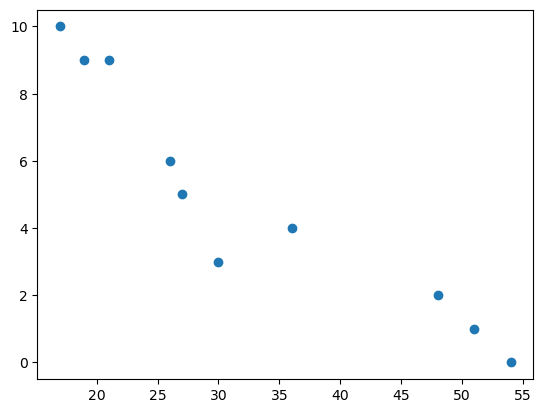

In [3]:
x = student_data[["Age"]]
y = student_data["Tardies"]

plt.scatter(x, y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- Comment : It is assumed there is negative correlation between the two variables (the more aged the less tardies).

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
#covariance:

covariance_matrix = student_data.cov()
cov_age_tardies = covariance_matrix.loc['Age', 'Tardies']


print(covariance_matrix)
print(cov_age_tardies)

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
-45.56666666666666


In [5]:
#correlation:

correlation_coefficient = student_data.corr().loc['Age', 'Tardies']
correlation_coefficient

-0.9391626886887121

- Comment : The result of covariance indicates there is negative linear relation between the two (If one increases, the other decreases). However, we can not determine the strength of the relation from the value of covariance. We need to see the result of correlation, which in this case is around 0.94, indicating strong negative relation of the two variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
from sklearn.metrics import mean_squared_error

#init the model
model = LinearRegression()
#train the model
model.fit(x,y)

#score it
pred = model.predict(x)

print("r^2 : ",model.score(x,y) )
print("rmse : ",np.sqrt(mean_squared_error(pred, y)))

r^2 :  0.8820265558250109
rmse :  1.1540884648655088


Plot your regression model on your scatter plot.

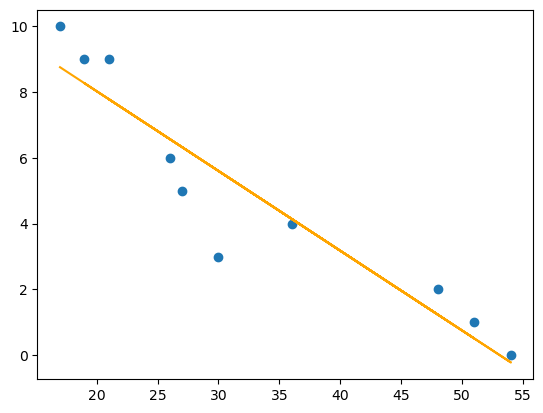

In [7]:
reg_line = model.intercept_ + model.coef_*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

- Comments : The r^2 (model prediction score) is close to 1, indicating that a large proportion of the variability in the target variable is explained by the model. However, the rmse (magnitude of error) is greater than 1, which could be considered relatively high given the range of the target (0-10), meaning that further consideration whether age alone is sufficient to predict tardiness or not is required.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
vehicles = pd.read_csv("https://raw.githubusercontent.com/ta-data-lis/lab-regression-analysis/master/your-code/vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
# Year
x1 = vehicles["Year"]
y = vehicles["CO2 Emission Grams/Mile"]

correlation_coefficient_1 = x1.corr(y)
correlation_coefficient_1

-0.22229960295054219

In [10]:
# Cylinders
x2 = vehicles["Cylinders"]
y = vehicles["CO2 Emission Grams/Mile"]

correlation_coefficient_2 = x2.corr(y)
correlation_coefficient_2

0.7523925537297493

In [11]:
# Fuel Barrels/Year
x3 = vehicles["Fuel Barrels/Year"]
y = vehicles["CO2 Emission Grams/Mile"]

correlation_coefficient_3 = x3.corr(y)
correlation_coefficient_3

0.9861886621428726

In [12]:
# Combined MPG
x4 = vehicles["Combined MPG"]
y = vehicles["CO2 Emission Grams/Mile"]

correlation_coefficient_4 = x4.corr(y)
correlation_coefficient_4

-0.926229038933643

In [13]:
# Fuel Cost/Year.
x5 = vehicles["Fuel Cost/Year"]
y = vehicles["CO2 Emission Grams/Mile"]

correlation_coefficient_5 = x5.corr(y)
correlation_coefficient_5

0.9308651512201841

- Comments : The most important variable is "Fuel Barrels/Year" with the strongest correlation result. The least related is "Year".

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
# Multilinear regression using the three variables with highest importance

x = vehicles[["Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]

#init the model
model = LinearRegression()
#train the model
model.fit(x,y)

#score it
pred = model.predict(x)

print("r^2 : ",model.score(x, y) )
print("rmse : ",np.sqrt(mean_squared_error(y, pred)))

r^2 :  0.9801993833262163
rmse :  16.75336370421535


In [ ]:
# Confirming range of y in order to evaluate the rmse result
max(vehicles["CO2 Emission Grams/Mile"])-min(vehicles["CO2 Emission Grams/Mile"])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

**Summary**
- Multilinear regression was used with three variables. These three were selected because this combination yields the strongest predictive power (r^2) and the lowest error level (rmse). Adding the remaining variables makes no difference.
- Given that r^2 is close to 1 and rmse is low (compared to a range of values for "CO2 Emission Grams/Mile" above 1200), the model could be said is reliable.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
relation = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
relation

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

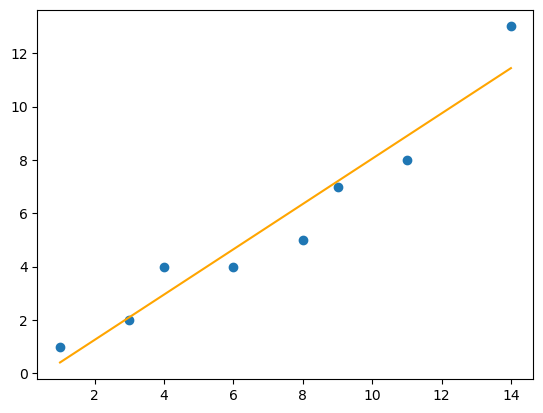

In [22]:
x = relation[["X"]]
y = relation["Y"]

#we first create an instance of the model

model = LinearRegression()

#we will train our model ("fit").This allows LinearRegression model to understand our data and pick the best reg line
model.fit(x,y)


#lets now draw our reg line
slope = model.coef_
interception = model.intercept_
reg_line = interception + slope*x

plt.plot(x, reg_line, c="orange")
plt.scatter(x,y)
plt.show()

In [23]:
# Checking the prediction power and error level of the model
pred = model.predict(x)

print("r^2 : ",model.score(x,y) )
print("rmse : ",np.sqrt(mean_squared_error(pred, y)))

r^2 :  0.9316696375519905
rmse :  0.9333874443188752


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

- Comments : there is a positive correlation between the two variables (more invited guests results in more attendants). However, the variation in the distance between the regression line and the plots suggests that there is room for improvement in accuracy.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

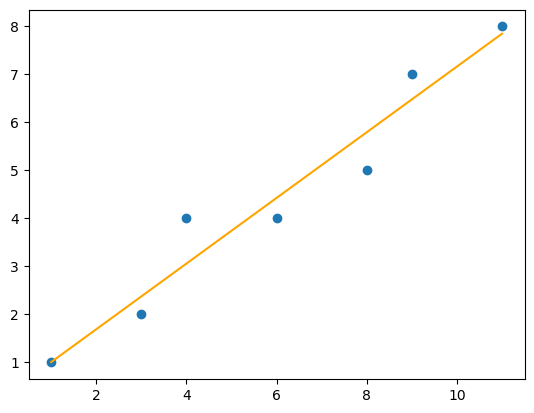

In [24]:
# w/o outlier
relation2 = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})

x2 = relation2[["X"]]
y2 = relation2["Y"]

#we first create an instance of the model

model = LinearRegression()

#we will train our model ("fit").This allows LinearRegression model to understand our data and pick the best reg line
model.fit(x2,y2)


#lets now draw our reg line
slope = model.coef_
interception = model.intercept_
reg_line2 = interception + slope*x2

plt.plot(x2, reg_line2, c="orange")
plt.scatter(x2,y2)
plt.show()

In [26]:
# Checking the prediction power and error level of the model
pred2 = model.predict(x2)

print("r^2 : ",model.score(x2,y2) )
print("rmse : ",np.sqrt(mean_squared_error(pred2, y2)))

r^2 :  0.9433811802232854
rmse :  0.5523118096904349


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

- Comments : Removing the outlier made the distance between the regression line and the plots constant (the line runs right through the center). r^2 and rmse values improved.